In [76]:
import numpy as np
import pandas as pd
import pypinyin
# Read character frequency from CSV file
# Assume the CSV has columns: 'character', 'frequency'
df = pd.read_csv('./Resources/CNfreq2.5B.csv')
# Display the DataFrame
df.head(10)

,serial number,character,token,frequency(per million),total coverage rate(%)
0,1.0,的,76938354,40529.65053,4.05297
1,2.0,一,35278860,18584.22740,5.91139
2,3.0,了,34812434,18338.52313,7.74524
3,4.0,是,31422712,16552.88253,9.40053
4,5.0,不,29858097,15728.67333,10.97340
5,6.0,我,29569261,15576.52006,12.53105
6,7.0,在,19195987,10112.07810,13.54226
7,8.0,人,18435295,9711.36013,14.51339
8,9.0,有,17847013,9401.46445,15.45354
9,10.0,这,17648808,9297.05385,16.38324


In [7]:
freq_char_list = list(zip(df.index, df['character']))
freq_char_list[-10:]  # Show first 10 as a sample

[(14966, '棷'),
 (14967, '鄒'),
 (14968, '稡'),
 (14969, '箤'),
 (14970, '濢'),
 (14971, '枠'),
 (14972, '絊'),
 (14973, '繓'),
 (14974, '飵'),
 (14975, nan)]

In [11]:
def to_base26(n):
    """Convert a non-negative integer to a base-26 string using uppercase letters."""
    if n < 0:
        raise ValueError("Only non-negative integers are supported.")
    chars = []
    while True:
        n, rem = divmod(n, 26)
        chars.append(chr(ord('A') + rem))
        if n == 0:
            break
        n -= 1  # Adjust for 0-indexed base-26 (Excel style)
    return ''.join(reversed(chars))

# 为 freq_char_list 的每个索引生成 26 进制字符串
base26_list = [(to_base26(idx), char) for idx, char in freq_char_list]
base26_list[-200:]  # 显示前20项作为示例

[('UVI', '釪'),
 ('UVJ', '隃'),
 ('UVK', '牏'),
 ('UVL', '艅'),
 ('UVM', '蕍'),
 ('UVN', '諛'),
 ('UVO', '澞'),
 ('UVP', '鮽'),
 ('UVQ', '匬'),
 ('UVR', '铻'),
 ('UVS', '噳'),
 ('UVT', '喐'),
 ('UVU', '喩'),
 ('UVV', '罭'),
 ('UVW', '嶎'),
 ('UVX', '銉'),
 ('UVY', '稶'),
 ('UVZ', '澦'),
 ('UWA', '諭'),
 ('UWB', '儥'),
 ('UWC', '礇'),
 ('UWD', '饇'),
 ('UWE', '驈'),
 ('UWF', '籞'),
 ('UWG', '欝'),
 ('UWH', '鬰'),
 ('UWI', '囦'),
 ('UWJ', '黿'),
 ('UWK', '褑'),
 ('UWL', '噮'),
 ('UWM', '曱'),
 ('UWN', '戉'),
 ('UWO', '恱'),
 ('UWP', '蚏'),
 ('UWQ', '龥'),
 ('UWR', '熅'),
 ('UWS', '蝹'),
 ('UWT', '溳'),
 ('UWU', '喗'),
 ('UWV', '馻'),
 ('UWW', '齫'),
 ('UWX', '惲'),
 ('UWY', '醞'),
 ('UWZ', '韗'),
 ('UXA', '溨'),
 ('UXB', '睵'),
 ('UXC', '賳'),
 ('UXD', '傤'),
 ('UXE', '酨'),
 ('UXF', '儹'),
 ('UXG', '賛'),
 ('UXH', '瓉'),
 ('UXI', '鏨'),
 ('UXJ', '塟'),
 ('UXK', '傮'),
 ('UXL', '璅'),
 ('UXM', '煰'),
 ('UXN', '皟'),
 ('UXO', '簀'),
 ('UXP', '襗'),
 ('UXQ', '謮'),
 ('UXR', '齰'),
 ('UXS', '譖'),
 ('UXT', '繒'),
 ('UXU', '譄'),
 ('UXV', '箚'),
 ('UXW', '

In [13]:
import csv

import matplotlib.pyplot as plt

# Export base26_list to CSV
with open('base26_characters.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Base26', 'Character'])
    writer.writerows(base26_list)

In [37]:
# 计算使用 base26 编码打一百万汉字所需的字母数
# 假设每个汉字用 base26 编码，编码长度等于其 base26 字符串长度

top_base26 = [label for label, char in base26_list]
base26_lengths = np.array(
    [len(label)+1 if len(label) < 3 else len(label) for label in top_base26]
)[:-1000]

# 统计汉字在一百万汉字中的出现频率
top_freqs = df.loc[:, 'frequency(per million)'].values[:-1000]
# 计算总共需要输入的字母数
total_base26_letters = (base26_lengths * top_freqs).sum()

# 拼音输入法的计算
def pinyin_length(char):
    """Calculate the length of the pinyin representation of a character."""
    pinyin = pypinyin.lazy_pinyin(char, style=pypinyin.Style.TONE3)
    return sum(len(s) for s in pinyin)
# 计算每个汉字的拼音长度
pinyin_lengths = np.array([pinyin_length(char) for char in df['character'].values[:-1000]])
# 计算总共需要输入的字母数
total_pinyin_letters = (pinyin_lengths * top_freqs).sum()

print(f"使用 base26 编码输入一百万汉字需按键数: {total_base26_letters}")
print(f"使用拼音输入法输入一百万汉字需按键数: {total_pinyin_letters}")
print(f"使用 base26 编码比拼音输入法节省的百分比: {(1 - total_base26_letters / total_pinyin_letters) * 100:.2f}%")

使用 base26 编码输入一百万汉字需按键数: 2736337.7885899995
使用拼音输入法输入一百万汉字需按键数: 3866724.40327
使用 base26 编码比拼音输入法节省的百分比: 29.23%


In [78]:
# Improve space
N = 27

def calculate_count(n1=5, n2=1, n3=0):
    return n1 + n2 * (N - n1) + (N - n1) * (N - n2) * (N - n3) + (N - n1) * (N - n2) * (N - n3) * N

def calculate_cost(n1=5, n2=1, n3=0):
    max_n = 12000
    limit_1 = n1
    limit_2 = n1 + n2 * (N - n1)
    limit_3 = n1 + n2 * (N - n1) + (N - n1) * (N - n2) * (N - n3)
    limit_3 = min(limit_3, max_n)

    one_buttons = df['frequency(per million)'].values[:limit_1].sum()
    two_buttons = df['frequency(per million)'].values[limit_1:limit_2].sum() * 2
    three_buttons = df['frequency(per million)'].values[limit_2:limit_3].sum() * 3
    four_buttons = df['frequency(per million)'].values[limit_3:max_n].sum() * 4
    total = one_buttons + two_buttons + three_buttons + four_buttons
    # print(f"one buttons: {one_buttons}, two buttons: {two_buttons}, three buttons: {three_buttons}, four buttons: {four_buttons}, total: {total}")
    return total

calculate_count(1), calculate_count(2), calculate_count(3), calculate_count(4),

(511083, 491427, 471771, 452115)

In [80]:
best_n1, best_n2, best_n3, best_cost = 0, 0, 0, float('inf')
for n1 in range(0, N+1):
    for n2 in range(0, N+1):
        for n3 in range(0, N+1):
            count = calculate_count(n1, n2, n3)
            if count < 15000:
                continue
            cost = calculate_cost(n1, n2, n3)
            if cost < best_cost:
                best_cost = cost
                best_n1, best_n2, best_n3 = n1, n2, n3
            print(f"n1: {n1}, n2: {n2}, n3: {n3}, count: {count}, cost: {cost}")
print(f"Best n1: {best_n1}, Best n2: {best_n2}, Best n3: {best_n3}, Best cost: {best_cost}, Count: {calculate_count(best_n1, best_n2)}")

n1: 0, n2: 0, n3: 0, count: 551124, cost: 2999993.16996
n1: 0, n2: 0, n3: 1, count: 530712, cost: 2999993.16996
n1: 0, n2: 0, n3: 2, count: 510300, cost: 2999993.16996
n1: 0, n2: 0, n3: 3, count: 489888, cost: 2999993.16996
n1: 0, n2: 0, n3: 4, count: 469476, cost: 2999993.16996
n1: 0, n2: 0, n3: 5, count: 449064, cost: 2999993.16996
n1: 0, n2: 0, n3: 6, count: 428652, cost: 2999993.16996
n1: 0, n2: 0, n3: 7, count: 408240, cost: 2999993.16996
n1: 0, n2: 0, n3: 8, count: 387828, cost: 2999993.16996
n1: 0, n2: 0, n3: 9, count: 367416, cost: 2999993.16996
n1: 0, n2: 0, n3: 10, count: 347004, cost: 2999993.16996
n1: 0, n2: 0, n3: 11, count: 326592, cost: 2999993.7008399996
n1: 0, n2: 0, n3: 12, count: 306180, cost: 2999995.17736
n1: 0, n2: 0, n3: 13, count: 285768, cost: 2999997.4539699997
n1: 0, n2: 0, n3: 14, count: 265356, cost: 3000001.13052
n1: 0, n2: 0, n3: 15, count: 244944, cost: 3000007.61809
n1: 0, n2: 0, n3: 16, count: 224532, cost: 3000019.7022500006
n1: 0, n2: 0, n3: 17, coun

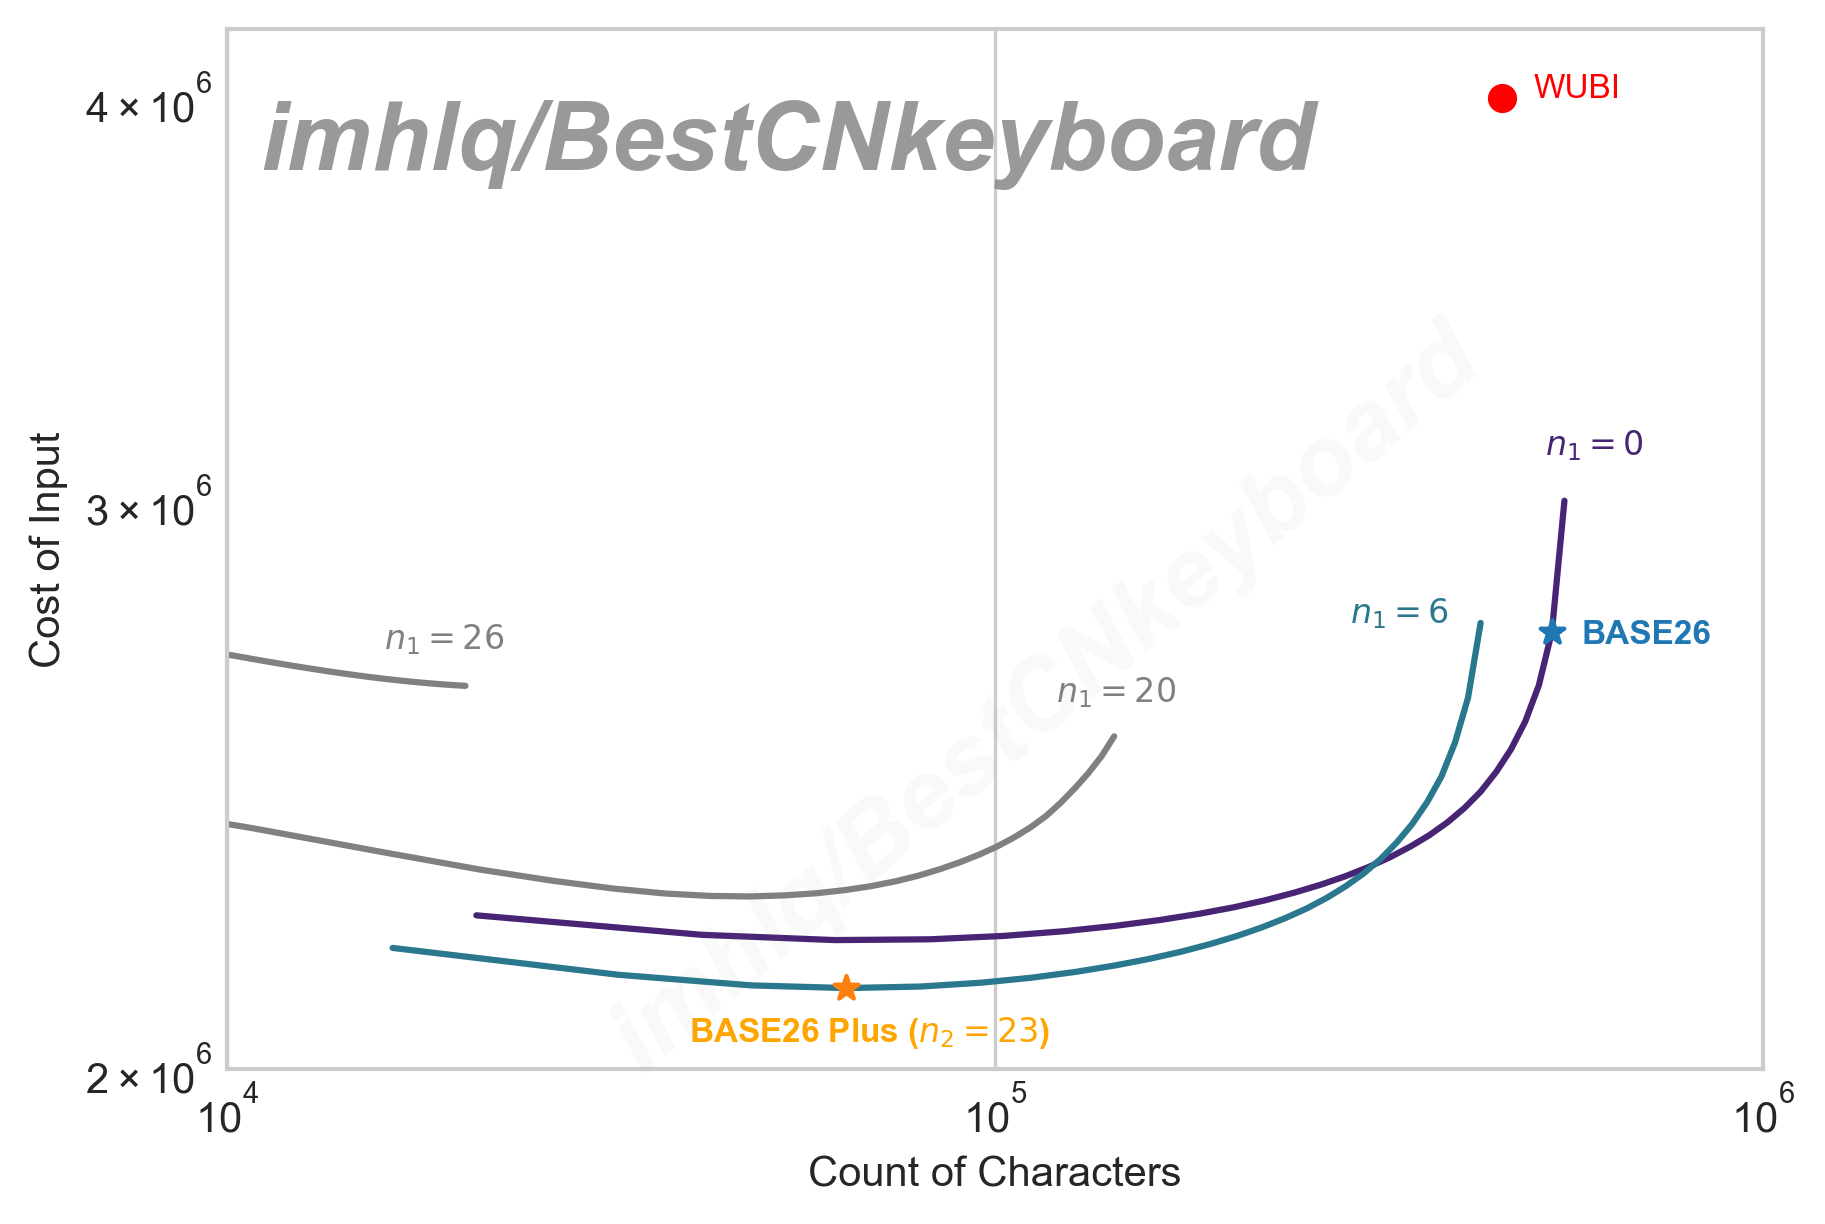

In [212]:
import matplotlib.pyplot as plt

plot_data = [
    {"n1": 0, "n2": 1, "n3": 0}, # BASE26 Default
    {"n1": 6, "n2": 23, "n3": 0}, # BASE26 Plus
]

# Plotting the data
plt.style.use('seaborn-v0_8-whitegrid') # Use a nice style
plt.figure(figsize=(6, 4), dpi=300)
colors = plt.cm.viridis([0.1, 0.4, 0.7, 0.9])
color_idx = 0

for data in plot_data:
    n1 = data['n1']
    n2 = data['n2']
    n3 = data['n3']
    count = calculate_count(n1, n2, n3)
    cost = calculate_cost(n1, n2, n3)
    plt.scatter(count, cost, label=f'n1={n1}, n2={n2}, n3={n3}', zorder=10, marker='*')
plt.text(4E4, 2.04E6, r"BASE26 Plus ($n_2=23$)", fontsize=8, fontdict={'weight': 'bold'}, color='orange')
plt.text(5.8E5, 2.71E6, r"BASE26", fontsize=8, fontdict={'weight': 'bold'}, color='C0')

# add some lines
count_n1s = []
cost_n1s = []
for _n2 in range(0, 27):
    count = calculate_count(0, _n2, 0)
    cost = calculate_cost(0, _n2, 0)
    count_n1s.append(count)
    cost_n1s.append(cost)
plt.plot(count_n1s, cost_n1s, color=colors[0], linestyle='-')
plt.text(520000, 3.1E6, r'$n_1=0$', color=colors[0], fontsize=8)

count_n1s = []
cost_n1s = []
for _n2 in range(0, 27):
    count = calculate_count(6, _n2, 0)
    cost = calculate_cost(6, _n2, 0)
    count_n1s.append(count)
    cost_n1s.append(cost)
plt.plot(count_n1s, cost_n1s, color=colors[1], linestyle='-')
plt.text(290000, 2.75E6, r'$n_1=6$', color=colors[1], fontsize=8)


count_n1s = []
cost_n1s = []
for _n2 in range(0, 27):
    count = calculate_count(20, _n2, 0)
    cost = calculate_cost(20, _n2, 0)
    count_n1s.append(count)
    cost_n1s.append(cost)
plt.plot(count_n1s, cost_n1s, color='grey', linestyle='-')
plt.text(120000, 2.6E6, r'$n_1=20$', color='grey', fontsize=8)

count_n1s = []
cost_n1s = []
for _n2 in range(0, 27):
    count = calculate_count(26, _n2, 0)
    cost = calculate_cost(26, _n2, 0)
    count_n1s.append(count)
    cost_n1s.append(cost)
plt.plot(count_n1s, cost_n1s, color='grey', linestyle='-')
plt.text(16000, 2.7E6, r'$n_1=26$', color='grey', fontsize=8)

# add special points
WUBI_cost = 4 * 1e6
WUBI_count = 26*26*26*26
plt.scatter(WUBI_count, WUBI_cost, color='red', label='WUBI', zorder=10)
plt.text(WUBI_count*1.1, WUBI_cost, r'WUBI', color='red', fontsize=8)

# add logo
plt.text(1.1E4, 3.8E6, 'imhlq/BestCNkeyboard', fontsize=23, fontdict={'weight': 'bold', "style": "italic"}, color='grey', alpha=0.8)
plt.text(3E4, 2E6, 'imhlq/BestCNkeyboard', fontsize=24, rotation=40, fontdict={'weight': 'bold', "style": "italic"}, color='grey', alpha=0.05)

plt.loglog()
plt.xlim(1e4, 1e6)
plt.ylim(2E6, 4.2E6)
# plt.title('Cost vs Count')
plt.tight_layout()
plt.xlabel('Count of Characters')
plt.ylabel('Cost of Input')
plt.savefig('cost_vs_count.png')